In [2]:
#Loading in Packages and Data

#Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
import xarray as xr
import os; import time
import pickle
import h5py
###############################################################
def coefs(coefficients,degree):
    coef=coefficients
    coefs=""
    for n in range(degree, -1, -1):
        string=f"({coefficients[len(coef)-(n+1)]:.1e})"
        coefs+=string + f"x^{n}"
        if n != 0:
            coefs+=" + "
    return coefs
###############################################################

#Importing Model Data
check=False
dir='/mnt/lustre/koa/koastore/torri_group/air_directory/Project/'
netCDF=xr.open_dataset(dir+'../cm1r20.3/run/cm1out_test7tundra-7_062217.nc') #***
true_time=netCDF['time']
parcel=xr.open_dataset(dir+'../cm1r20.3/run/cm1out_pdata_test5tundra-7_062217.nc') #***
times=netCDF['time'].values/(1e9 * 60); times=times.astype(float);

#Restricts the timesteps of the data from timesteps0 to 140
data=netCDF.isel(time=np.arange(0,140+1))
parcel=parcel.isel(time=np.arange(0,140+1))

# #uncomment if using 250m data
# #Importing Model Data
# check=False
# dir2='/home/air673/koa_scratch/'
# data=xr.open_dataset(dir2+'cm1out_250m.nc') #***
# parcel=xr.open_dataset(dir2+'cm1out_pdata_250m.nc') #***

# # Restricts the timesteps of the data from timesteps0 to 140
# data=data.isel(time=np.arange(0,400+1))
# parcel=parcel.isel(time=np.arange(0,400+1))

In [1]:
import sys
dir='/mnt/lustre/koa/koastore/torri_group/air_directory/DCI-Project/'
path=dir+'../Functions/'
sys.path.append(path)

import NumericalFunctions
from NumericalFunctions import * # import NumericalFunctions 
import Plotting
from PlottingFunctions import * # import NumericalFunctions 


# Get all functions in NumericalFunctions
import inspect
functions = [f[0] for f in inspect.getmembers(NumericalFunctions, inspect.isfunction)]
functions

['Ddt',
 'Ddx',
 'Ddy',
 'Ddz',
 'DdzStretch',
 'Divergence3D',
 'Divergence3DStretch',
 'DivergenceHoriz',
 'HorizAvg_zt',
 'HorizProfile_txy',
 'Laplacian3D',
 'Laplacian3DStretch',
 'LaplacianHoriz',
 'Slice',
 'VertProfile_z']

In [17]:
u_data=data['u'].interp(xf=data['xh']).data
v_data=data['v'].interp(yf=data['yh']).data

In [18]:
conv=-(Ddx(u_data,dx=1000)+Ddy(v_data,dy=1000))

Text(0.5, 1.0, 'Convergence Y-Average')

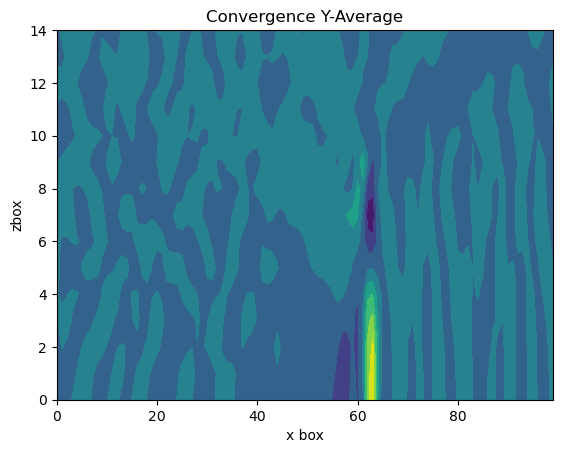

In [31]:
ymean=np.mean(conv[10],axis=1)

limited=ymean[0:15,200:300]
plt.contourf(limited)
plt.ylabel('zbox');plt.xlabel('x box');plt.title('Convergence Y-Average')